<a href="https://colab.research.google.com/github/MrLuciferM/Coursera_Capstone/blob/master/Week5full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM Data Science Capstone Project

This notebook will guide you through a theoretical business problem. The question that we are trying to answer is the following:
The objective of this capstone project is to analyze and select the best locations in New York City, USA to open a Japanese cuisine restaurant. Using Data Science
Methodology and machine learning techniques like clustering, this project aims to provide solutions to answer the question: If a successful owner of multiple mid to high-end restaurants decided to open a new Japanese restaurant in the NYC, where would you recommend they open it?


To do this, we will need the following data:

+ List of the districts of New York City -> this comes from a csv list
+ Geo-coordinates of the districts in New York City -> this is obtained via geocoder
+ Top venues of districts -> Foursquare API is used to collect the venue data

### 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json

!pip install geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder

import geocoder # to get coordinates

!pip install beautifulsoup4

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

     |████████████████████████████████| 112kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 102kB 2.8MB/s ta 0:00:011
     |████████████████████████████████| 829kB 6.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
     |████████████████████████████████| 122kB 7.6MB/s eta 0:00:01
Libraries imported.


### 2. Scrapping Neighborhood data

In [ ]:
data = requests.get("https://yourneighborhood.co/neighborhood/list").text

In [ ]:
soup = BeautifulSoup(data, 'html.parser')

In [ ]:
neighborhoodList = []
for i in range(5):
    for row in soup.find_all("div", class_="borough-list")[i].findAll("li"):
        neighborhoodList.append(row.text)

neighborhoodList

['Alphabet City',
 'Battery Park City',
 'Carnegie Hill',
 'Chelsea',
 'Chinatown',
 'East Harlem',
 'East Village',
 'Financial District',
 'Flatiron District',
 'Gramercy Park',
 'Greenwich Village',
 'Harlem',
 "Hell's Kitchen/Clinton",
 'Inwood',
 'Kips Bay',
 'Lincoln Square',
 'Lower East Side',
 'Manhattan Valley',
 'Midtown East',
 'Midtown West',
 'Morningside Heights',
 'Murray Hill',
 'NoLita/Little Italy',
 'Roosevelt Island',
 'SoHo',
 'Tribeca',
 'Upper East Side',
 'Upper West Side',
 'Washington Heights',
 'West Village',
 'Baychester/Co-op City',
 'Bedford Park',
 'Belmont',
 'Bronxdale',
 'Castle Hill',
 'City Island',
 'Concourse Village/Grand Concourse/Morrisania',
 'Country Club',
 'Fieldston',
 'Fordham',
 'Hunts Point',
 'Kingsbridge',
 'Kingsbridge Heights',
 'Melrose',
 'Morris Heights',
 'Morris Park',
 'Mott Haven',
 'Parkchester',
 'Pelham Bay',
 'Pelham Gardens',
 'Pelham Parkway',
 'Port Morris',
 'Riverdale',
 'Soundview',
 'Throgs Neck',
 'Tremont',
 'Un

In [ ]:
nyc_df = pd.DataFrame({"Neighborhoods" : neighborhoodList})
nyc_df.head()

,Neighborhoods
0,Alphabet City
1,Battery Park City
2,Carnegie Hill
3,Chelsea
4,Chinatown


In [ ]:
nyc_df.tail()

,Neighborhoods
193,Travis
194,West New Brighton
195,Westerleigh
196,Willowbrook
197,Woodrow


In [ ]:
nyc_df.shape

(198, 1)

In [ ]:
nyc_df.nunique()

Neighborhoods    197
dtype: int64

In [ ]:
nyc_df = nyc_df.drop_duplicates()
nyc_df.shape

(197, 1)

### 3. Get the geographical coordinates

In [ ]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, NYC, USA'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [ ]:
coords = [ get_latlng(neighborhood) for neighborhood in nyc_df.Neighborhoods.tolist() ]

In [ ]:
coords

[[40.725990000000024, -73.98056999999994],
 [40.711310000000026, -74.01589999999999],
 [40.76489000000004, -73.98027999999994],
 [40.60119000000003, -74.19554999999997],
 [40.71646000000004, -73.99675999999994],
 [40.798280000000034, -73.94080999999994],
 [40.72804000000008, -73.98498999999998],
 [40.709010000000035, -74.01060999999999],
 [40.73942000000005, -73.99034999999998],
 [40.73682000000008, -73.98458999999997],
 [40.72856000000007, -74.00488999999999],
 [40.80881000000005, -73.94795999999997],
 [40.761520000000075, -73.99060999999995],
 [40.865950000000055, -73.92606999999998],
 [40.74213000000003, -73.97780999999998],
 [40.77688000000006, -73.98320999999999],
 [40.71693000000005, -73.98422999999997],
 [40.710368648298, -73.99221892226547],
 [40.75090000000006, -73.96441999999996],
 [40.74977000000007, -73.99545999999998],
 [40.81053000000003, -73.96205999999995],
 [40.76583000000005, -73.80841999999996],
 [40.72130000000004, -73.99733999999995],
 [40.764560000000074, -73.9473

In [ ]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
pd.option_context('display.float_format', '{:0.20f}'.format)
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [ ]:
# merge the coordinates into the original dataframe
nyc_df['Latitude'] = df_coords['Latitude']
nyc_df['Longitude'] = df_coords['Longitude']

In [ ]:
nyc_df.head()

,Neighborhoods,Latitude,Longitude
0,Alphabet City,40.72599,-73.98057
1,Battery Park City,40.71131,-74.01590
2,Carnegie Hill,40.76489,-73.98028
3,Chelsea,40.60119,-74.19555
4,Chinatown,40.71646,-73.99676


In [ ]:
nyc_df.tail()

,Neighborhoods,Latitude,Longitude
193,Travis,40.63474,-74.11271
194,West New Brighton,40.62102,-74.13205
195,Westerleigh,40.60317,-74.13905
196,Willowbrook,40.54316,-74.19761
197,Woodrow,NaN,NaN


In [ ]:
nyc_df[nyc_df.Latitude.isnull()]

,Neighborhoods,Latitude,Longitude
197,Woodrow,NaN,NaN


In [ ]:
coord = get_latlng("Woodrow")
coord

[40.54316000000006, -74.19760999999994]

In [ ]:
nyc_df.loc[[197],["Latitude","Longitude"]] = coord

In [ ]:
nyc_df.tail()

,Neighborhoods,Latitude,Longitude
193,Travis,40.63474,-74.11271
194,West New Brighton,40.62102,-74.13205
195,Westerleigh,40.60317,-74.13905
196,Willowbrook,40.54316,-74.19761
197,Woodrow,40.54316,-74.19761


In [ ]:
nyc_df.nunique()

Neighborhoods    197
Latitude         196
Longitude        196
dtype: int64

In [ ]:
nyc_df.shape

(197, 3)

In [ ]:
nyc_df.to_csv("nyc_df.csv", index = False)

### 4. Create a map of NYC with neighborhoods superimposed on top

In [ ]:
address = 'NYC, USA'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of NYC, USA {}, {}.'.format(latitude, longitude))

The geograpical coordinates of NYC, USA 40.7127281, -74.0060152.


In [ ]:
# create map of Toronto using latitude and longitude values
map_nyc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(nyc_df['Latitude'], nyc_df['Longitude'], nyc_df['Neighborhoods']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_nyc)  
    
map_nyc

In [ ]:
map_nyc.save('nyc_map.html')

In [ ]:
# define Foursquare Credentials and Version
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200802' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

**Now, let's get the top 100 venues that are within a radius of 2000 meters.**

In [ ]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(nyc_df['Latitude'], nyc_df['Longitude'], nyc_df['Neighborhoods']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [ ]:

# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(18050, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Alphabet City,40.72599,-73.98057,Sunny & Annie Gourmet Deli,40.724590,-73.981600,Deli / Bodega
1,Alphabet City,40.72599,-73.98057,Tompkins Square Park Dog Run,40.726538,-73.981297,Dog Run
2,Alphabet City,40.72599,-73.98057,Sake Bar Satsko,40.724647,-73.980190,Sake Bar
3,Alphabet City,40.72599,-73.98057,The Wayland,40.725264,-73.978040,Cocktail Bar
4,Alphabet City,40.72599,-73.98057,Miss Lily's 7A,40.726058,-73.983686,Caribbean Restaurant


In [ ]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Alphabet City,100,100,100,100,100,100
Annadale,57,57,57,57,57,57
Arden Heights,81,81,81,81,81,81
Arrochar,98,98,98,98,98,98
Arverne,47,47,47,47,47,47
Astoria,100,100,100,100,100,100
Bath Beach,100,100,100,100,100,100
Battery Park City,100,100,100,100,100,100
Bay Ridge,100,100,100,100,100,100


In [ ]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 422 uniques categories.


In [ ]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Deli / Bodega', 'Dog Run', 'Sake Bar', 'Cocktail Bar',
       'Caribbean Restaurant', 'Beer Bar', 'Fried Chicken Joint',
       'Vegetarian / Vegan Restaurant', 'Wine Bar', 'Bagel Shop',
       'Beer Store', 'Korean Restaurant', 'Moroccan Restaurant',
       'Pet Café', 'Art Gallery', 'Scandinavian Restaurant',
       'Breakfast Spot', 'Bar', 'Vietnamese Restaurant',
       'Organic Grocery', 'Juice Bar', 'Seafood Restaurant',
       'Japanese Restaurant', 'Mexican Restaurant', 'Gourmet Shop',
       'Pizza Place', 'Arts & Crafts Store', 'Coffee Shop',
       'Ice Cream Shop', 'New American Restaurant', 'Greek Restaurant',
       'Park', 'BBQ Joint', 'Argentinian Restaurant', 'Asian Restaurant',
       'French Restaurant', 'Mediterranean Restaurant', 'Speakeasy',
       'Filipino Restaurant', 'Burger Joint', 'Grocery Store',
       'Club House', 'Hotel', 'Miscellaneous Shop', 'Thai Restaurant',
       'Dance Studio', 'Theater', 'Gym / Fitness Center', 'Wine Shop',
       'Café'

In [ ]:
# check if the results contain "Indian"
"Neighborhood" in venues_df['VenueCategory'].unique()

True

### 6. Analyze Each Neighborhood

In [ ]:
# one hot encoding
nyc_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

print(nyc_onehot.shape)
nyc_onehot.head()

(18050, 423)


,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Sho

In [ ]:
nyc_onehot_grouped = nyc_onehot.groupby('Neighborhoods').mean().reset_index()
nyc_onehot_grouped.head()

,Neighborhoods,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Casino,Castle,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Sho

In [ ]:
len(nyc_onehot_grouped[nyc_onehot_grouped["Indian Restaurant"] > 0])

67

In [ ]:
# Create a new DataFrame for Shopping Mall data only

nyc_Ind = nyc_onehot_grouped[["Neighborhoods","Indian Restaurant"]]
nyc_Ind.head()

,Neighborhoods,Indian Restaurant
0,Alphabet City,0.0
1,Annadale,0.0
2,Arden Heights,0.0
3,Arrochar,0.0
4,Arverne,0.0


### 7. Cluster Neighborhoods

1.   **Based on Indian restaurents only**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [ ]:
# Cluster Neighborhoods
# Run k-means to cluster the neighborhoods in Kuala Lumpur into 3 clusters.
from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

kclusters = 8
for k in range(2,kclusters):
    nyc_clustering = nyc_Ind.drop(["Neighborhoods"], 1)

    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit_predict(nyc_clustering)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(nyc_clustering, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

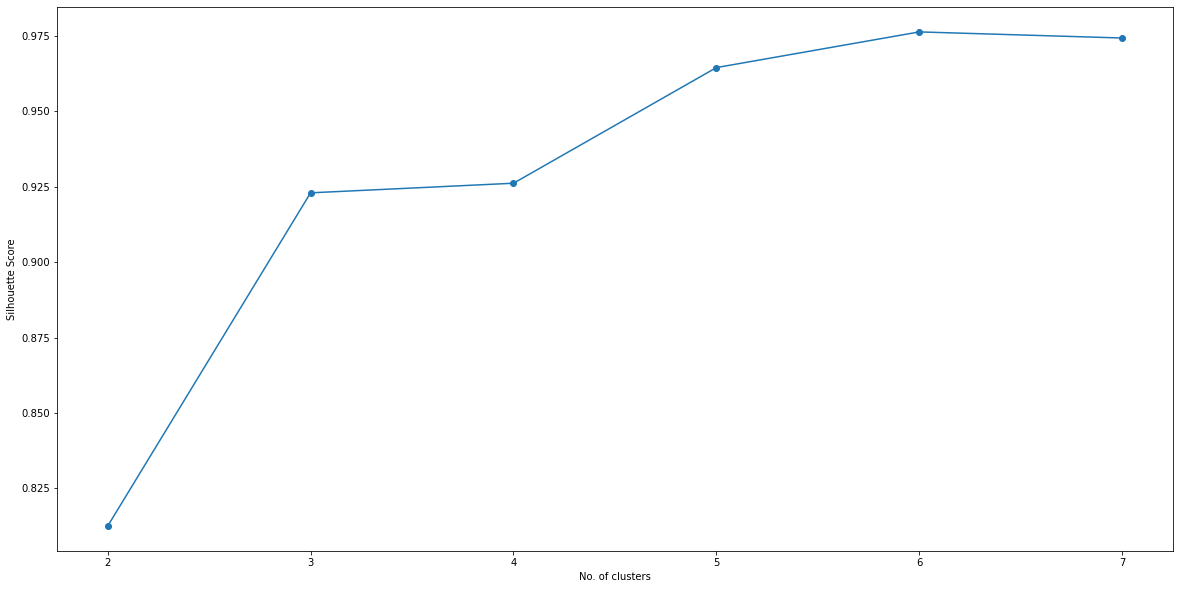

In [ ]:
plot(kclusters, scores, "No. of clusters", "Silhouette Score")

In [ ]:
# run k-means clustering
kmeans = KMeans(n_clusters=6, random_state=0).fit(nyc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 5, 1, 0, 0, 3], dtype=int32)

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
nyc_merged = nyc_Ind.copy()

# add clustering labels
nyc_merged["Cluster Labels"] = kmeans.labels_

nyc_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
nyc_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,Alphabet City,0.0,1
1,Annadale,0.0,1
2,Arden Heights,0.0,1
3,Arrochar,0.0,1
4,Arverne,0.0,1


In [ ]:
nyc_merged = nyc_merged.join(nyc_df.set_index("Neighborhoods"), on="Neighborhood")

print(nyc_merged.shape)
nyc_merged.head()

(197, 5)


,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
0,Alphabet City,0.0,1,40.725990,-73.980570
1,Annadale,0.0,1,40.538610,-74.171640
2,Arden Heights,0.0,1,40.554140,-74.173910
3,Arrochar,0.0,1,40.598400,-74.072580
4,Arverne,0.0,1,40.592785,-73.787865


In [ ]:
# sort the results by Cluster Labels
print(nyc_merged.shape)
nyc_merged.sort_values(["Cluster Labels"], inplace=True)
nyc_merged.head()

(197, 5)


,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
179,Tribeca,0.010000,0,40.71854,-74.00888
34,Castle Hill,0.011364,0,40.82029,-73.84832
150,Richmondtown,0.012987,0,40.56911,-74.13096
117,Middle Village,0.010000,0,40.71317,-73.87509
148,Rego Park,0.010000,0,40.73193,-73.86887


In [ ]:
# Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
map_clusters.save('map_clusters_ind.html')

### Examine Clusters
**Indian Restaurant data**

**Cluster 0**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
151,Ridgewood,0.010000,0,40.698129,-73.910641
148,Rego Park,0.010000,0,40.731930,-73.868870
117,Middle Village,0.010000,0,40.713170,-73.875090
146,Queens Village,0.010000,0,40.744372,-73.930546
38,Chinatown,0.010000,0,40.716460,-73.996760
145,Prospect Park South/Kensington,0.010000,0,40.644946,-73.974391
40,Clifton,0.010526,0,40.619980,-74.077320
144,Prospect Heights,0.010000,0,40.677470,-73.965830
118,Midland Beach,0.010000,0,40.572840,-74.095230
119,Midtown East,0.010000,0,40.750900,-73.964420


**Cluster 1**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
106,Little Neck,0.0,1,40.677310,-73.986290
181,Upper East Side,0.0,1,40.770620,-73.957030
105,Lincoln Square,0.0,1,40.776880,-73.983210
180,University Heights,0.0,1,40.860190,-73.909710
104,Laurelton,0.0,1,40.666920,-73.752150
112,Manor Heights,0.0,1,40.776401,-73.750904
120,Midtown West,0.0,1,40.749770,-73.995460
121,Midwood,0.0,1,40.623260,-73.956530
107,Livingston,0.0,1,40.895076,-73.901631
108,Long Island City,0.0,1,40.764445,-73.721602


**Cluster 2**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
196,Woodside,0.05,2,40.745059,-73.904264
67,Floral Park,0.04,2,40.723640,-73.705760
16,Bellerose,0.04,2,40.723040,-73.715460
22,Briarwood,0.04,2,40.713300,-73.814700


**Cluster 3**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
9,Bay Street,0.02,3,40.77186,-73.750495
54,East Elmhurst,0.02,3,40.77078,-73.893170
127,Murray Hill,0.02,3,40.76583,-73.808420
98,Jamaica Estates,0.02,3,40.71795,-73.782690
182,Upper West Side,0.02,3,40.79251,-73.973200
123,Morningside Heights,0.02,3,40.81053,-73.962060
89,Hillcrest,0.02,3,40.72696,-73.798320


**Cluster 4**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 4]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
97,Jamaica,0.03,4,40.724216,-73.724889
58,Elmhurst,0.03,4,40.745016,-73.878274
99,Jamaica Hills,0.03,4,40.713360,-73.798870
5,Astoria,0.03,4,40.768609,-73.909420
125,Morris Park,0.03,4,40.690370,-73.816500


**Cluster 5**

In [ ]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 5]

,Neighborhood,Indian Restaurant,Cluster Labels,Latitude,Longitude
74,Glen Oaks,0.07,5,40.748000,-73.713240
100,Kew Gardens,0.06,5,40.703686,-73.818932


**Observations:**

Most of the Indian restaurants are concentrated in clusters 2,4 and 5 which means high competetion

Cluster 0 and 3 have lesser number of Indian Restaurants which means lesser competition

Cluster 1 have no Indian restaurents which might be because of other factors like gastronomy and less cultural diversity.

### 8. Cluster Neighborhoods



2.   **For Other factors like gastronomy and other different types of venues**



In [ ]:
# Putting it into a dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = nyc_onehot_grouped['Neighborhoods']

for ind in np.arange(nyc_onehot_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_onehot_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alphabet City,Pizza Place,Bookstore,Ice Cream Shop,Gourmet Shop,Wine Bar,Coffee Shop,Juice Bar,Thai Restaurant,Bagel Shop,Café
1,Annadale,Italian Restaurant,Sushi Restaurant,Pizza Place,Bank,Diner,Train Station,Ice Cream Shop,Pharmacy,Bagel Shop,Coffee Shop
2,Arden Heights,Pizza Place,Italian Restaurant,Sushi Restaurant,Pharmacy,Coffee Shop,Train Station,Bank,Sandwich Place,Restaurant,Bagel Shop
3,Arrochar,Italian Restaurant,Pizza Place,Bus Stop,Bank,Deli / Bodega,Pharmacy,Grocery Store,Historic Site,Bar,Ice Cream Shop
4,Arverne,Beach,Pizza Place,Surf Spot,Donut Shop,Metro Station,Bus Stop,Supermarket,Gym / Fitness Center,Caribbean Restaurant,Bank


In [ ]:
### Using Machine Learning for Clustering Neighborhoods
### For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.

### First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [ ]:
max_range = 8

nyc_onehot_grouped_clustering = nyc_onehot_grouped.drop('Neighborhoods', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = nyc_onehot_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

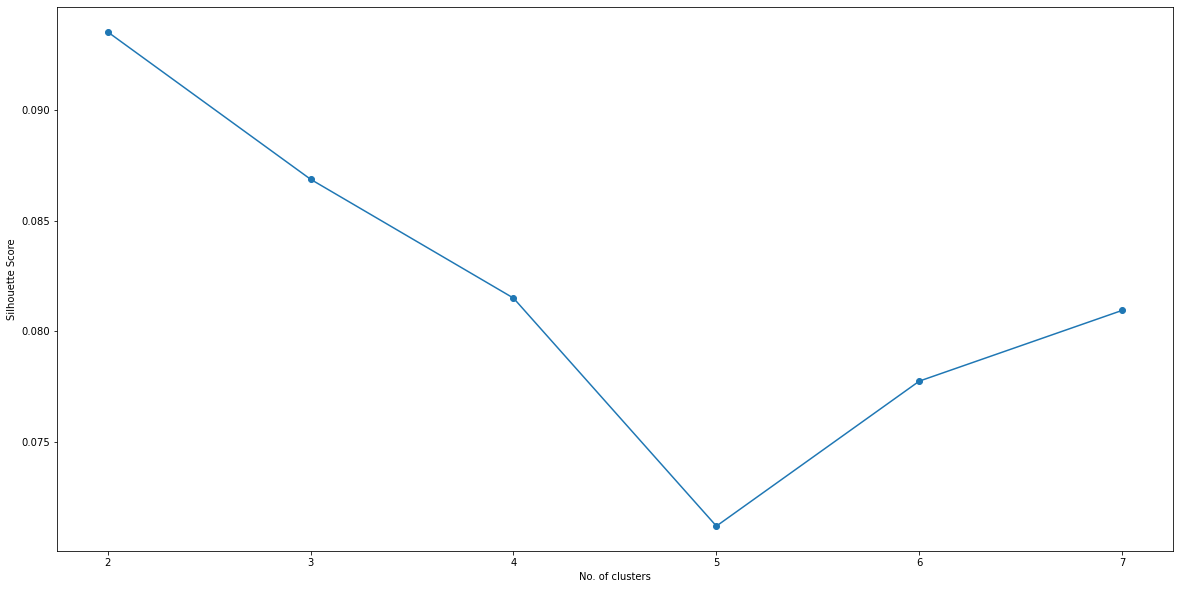

In [ ]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(nyc_onehot_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
nyc_gastronomy = nyc_df.copy()
nyc_gastronomy.head()

,Neighborhoods,Latitude,Longitude
0,Alphabet City,40.72599,-73.98057
1,Battery Park City,40.71131,-74.01590
2,Carnegie Hill,40.76489,-73.98028
3,Chelsea,40.60119,-74.19555
4,Chinatown,40.71646,-73.99676


In [ ]:
# merge nyc_gastronomy with budapest_data to add latitude/longitude for each neighborhood
nyc_gastronomy = nyc_gastronomy.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

nyc_gastronomy.head()

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alphabet City,40.72599,-73.98057,0,Pizza Place,Bookstore,Ice Cream Shop,Gourmet Shop,Wine Bar,Coffee Shop,Juice Bar,Thai Restaurant,Bagel Shop,Café
1,Battery Park City,40.71131,-74.01590,0,Park,Coffee Shop,Gym / Fitness Center,Hotel,American Restaurant,Gym,Cocktail Bar,Memorial Site,Burger Joint,Plaza
2,Carnegie Hill,40.76489,-73.98028,0,Theater,Hotel,Concert Hall,Spa,Plaza,Gym,Performing Arts Venue,French Restaurant,Pizza Place,Dance Studio
3,Chelsea,40.60119,-74.19555,0,Hotel,Bowling Alley,Bus Stop,Italian Restaurant,Gym,Sports Club,Department Store,Café,Boxing Gym,Theme Park
4,Chinatown,40.71646,-73.99676,0,Hotel,Coffee Shop,Italian Restaurant,Thai Restaurant,Café,Bakery,Mediterranean Restaurant,Spa,Vegetarian / Vegan Restaurant,New American Restaurant


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_gastronomy['Latitude'], nyc_gastronomy['Longitude'], nyc_gastronomy['Neighborhoods'], nyc_gastronomy['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 0

In [ ]:
nyc_gastronomy.loc[nyc_gastronomy['Cluster Labels'] == 0, nyc_gastronomy.columns]

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alphabet City,40.725990,-73.980570,0,Pizza Place,Bookstore,Ice Cream Shop,Gourmet Shop,Wine Bar,Coffee Shop,Juice Bar,Thai Restaurant,Bagel Shop,Café
1,Battery Park City,40.711310,-74.015900,0,Park,Coffee Shop,Gym / Fitness Center,Hotel,American Restaurant,Gym,Cocktail Bar,Memorial Site,Burger Joint,Plaza
2,Carnegie Hill,40.764890,-73.980280,0,Theater,Hotel,Concert Hall,Spa,Plaza,Gym,Performing Arts Venue,French Restaurant,Pizza Place,Dance Studio
3,Chelsea,40.601190,-74.195550,0,Hotel,Bowling Alley,Bus Stop,Italian Restaurant,Gym,Sports Club,Department Store,Café,Boxing Gym,Theme Park
4,Chinatown,40.716460,-73.996760,0,Hotel,Coffee Shop,Italian Restaurant,Thai Restaurant,Café,Bakery,Mediterranean Restaurant,Spa,Vegetarian / Vegan Restaurant,New American Restaurant
5,East Harlem,40.798280,-73.940810,0,Coffee Shop,Park,Pizza Place,Mexican Restaurant,Southern / Soul Food Restaurant,Café,Wine Shop,Wine Bar,Latin American Restaurant,Bakery
6,East Village,40.728040,-73.984990,0,Juice Bar,Pizza Place,Ice Cream Shop,Park,Bookstore,Café,New American Restaurant,Gourmet Shop,Coffee Shop,Asian Restaurant
7,Financial District,40.709010,-74.010610,0,Park,Cocktail Bar,Coffee Shop,Memorial Site,Hotel,Burger Joint,Plaza,Falafel Restaurant,Gym / Fitness Center,Spa
8,Flatiron District,40.739420,-73.990350,0,Gym / Fitness Center,New American Restaurant,American Restaurant,Bakery,Gourmet Shop,Park,Cycle Studio,Ice Cream Shop,Grocery Store,Juice Bar
9,Gramercy Park,40.736820,-73.984590,0,Coffee Shop,Gym / Fitness Center,Gourmet Shop,Pizza Place,New American Restaurant,Juice Bar,Korean Restaurant,Japanese Restaurant,Park,Grocery Store


## Cluster 1

In [ ]:
nyc_gastronomy.loc[nyc_gastronomy['Cluster Labels'] == 1, nyc_gastronomy.columns]

,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Baychester/Co-op City,40.869400,-73.826071,1,Caribbean Restaurant,Pharmacy,Donut Shop,Clothing Store,Shopping Mall,Grocery Store,Fast Food Restaurant,Italian Restaurant,Pizza Place,Supermarket
31,Bedford Park,40.869990,-73.885730,1,Pizza Place,Italian Restaurant,Garden,Deli / Bodega,Mexican Restaurant,Diner,Park,Bakery,Dessert Shop,Plaza
32,Belmont,40.855460,-73.885690,1,Italian Restaurant,Pizza Place,Zoo,Garden,Café,Bakery,Zoo Exhibit,Deli / Bodega,Dessert Shop,Park
33,Bronxdale,40.850080,-73.866830,1,Italian Restaurant,Pizza Place,Zoo,Deli / Bodega,Garden,Park,Coffee Shop,Bakery,Zoo Exhibit,Dessert Shop
34,Castle Hill,40.820290,-73.848320,1,Pizza Place,Latin American Restaurant,Diner,Grocery Store,Park,Bar,Mexican Restaurant,Chinese Restaurant,Supermarket,Spanish Restaurant
36,Concourse Village/Grand Concourse/Morrisania,40.848492,-73.906617,1,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Park,Dessert Shop,Spanish Restaurant,Liquor Store,Café,Gym
37,Country Club,40.846230,-73.820710,1,Pizza Place,Italian Restaurant,Sandwich Place,Bakery,American Restaurant,Bar,Diner,Gym,Pharmacy,Mexican Restaurant
38,Fieldston,40.895610,-73.900850,1,Pizza Place,Donut Shop,Mexican Restaurant,Bar,Park,Burger Joint,Sandwich Place,Bakery,Diner,Bank
39,Fordham,40.858940,-73.898850,1,Italian Restaurant,Pizza Place,Bakery,Deli / Bodega,Zoo,Garden,Café,Spanish Restaurant,Mexican Restaurant,Liquor Store
40,Hunts Point,40.812420,-73.884500,1,Pizza Place,Pharmacy,Park,Fast Food Restaurant,Donut Shop,Grocery Store,Sandwich Place,Mobile Phone Shop,Bank,Mexican Restaurant


In [ ]:
### Observations: 
There are 2 clusters.
In the Clustor 0, we can see lot's of gastronomy related venues (coffee shop, pizza place, Thai restaurant, Mexican Restaurants, pub, etc..).
In the Clustor 1, top gastronomy is not really represented (Pizza restaurants and fast food are in the top).

## Final Conclusion:
### Approach 1 (Indian Restaurants):

[Indian Restaurants](https://colab.research.google.com/github/MrLuciferM/Coursera_Capstone/blob/master/Week5full.ipynb#scrollTo=oK2GpvocWtB7)

Most of the Indian restaurants are concentrated in clusters 2,4 and 5 which means high competetion

Cluster 0 and 3 have lesser number of Indian Restaurants which means lesser competition

Cluster 1 have no Indian restaurents which might be because of other factors like gastronomy and less cultural diversity.

Cluster 0 will be great to start an Indian restaurant because of less competetion.

### Approach 2 (Gastronomy Related venues):

[Gastronomy](https://colab.research.google.com/github/MrLuciferM/Coursera_Capstone/blob/master/Week5full.ipynb#scrollTo=loMhJ6MBaVSH)

Our main focus will be  Clustor 0 as we can see lot's of gastronomy related venues (coffee shop, pizza place, Thai restaurant, Mexican Restaurants, pub, etc..). In the Clustor 1, top gastronomy is not really represented (Pizza restaurants and fast food are in the top).

Therefore, cluster 0 will be the best option to start a highend Indian resaurant.